Cíle analýzy:
- celkový počet nehod 2024 praha ✅
- sézonní období ✅, měsíční nehody ✅
- nehody podle dne v týdnu ✅ a hodiny dne ✅
- nejčastější typy nehod (srážka s chodcem, ...)
- hlavní příčiny nehody (alkohol?, rychlost?)
- hmotné škody
- závažnost nehody (hmotná, lehká, těžká, smrtelná)

sloupcové & spojnicové grafy
tabulky shrnující klíčové statistiky

Celkový počet nehod roku 2024 v Praze

In [211]:
import geopandas as gpd

# Načtení data, utf-8 pro český jazyk
filename = "nehody_202401-202412.geojson"
file = open(filename, encoding="utf-8")
df = gpd.read_file(file)

# počet všech nehod
total_accidents = len(df)
print(f"Celkový počet nehod v roce 2024: {total_accidents}")

df.info()

Celkový počet nehod v roce 2024: 11361
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 11361 entries, 0 to 11360
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   datum          11361 non-null  datetime64[ms, UTC]
 1   usmrceno       11361 non-null  int32              
 2   tezce_zraneno  11361 non-null  int32              
 3   lehce_zraneno  11361 non-null  int32              
 4   druh           11361 non-null  object             
 5   pricina        11361 non-null  object             
 6   hmotna_skoda   11361 non-null  object             
 7   geometry       11361 non-null  geometry           
dtypes: datetime64[ms, UTC](1), geometry(1), int32(3), object(3)
memory usage: 577.1+ KB


Graf měsíční nehody v roce 2024 v Praze

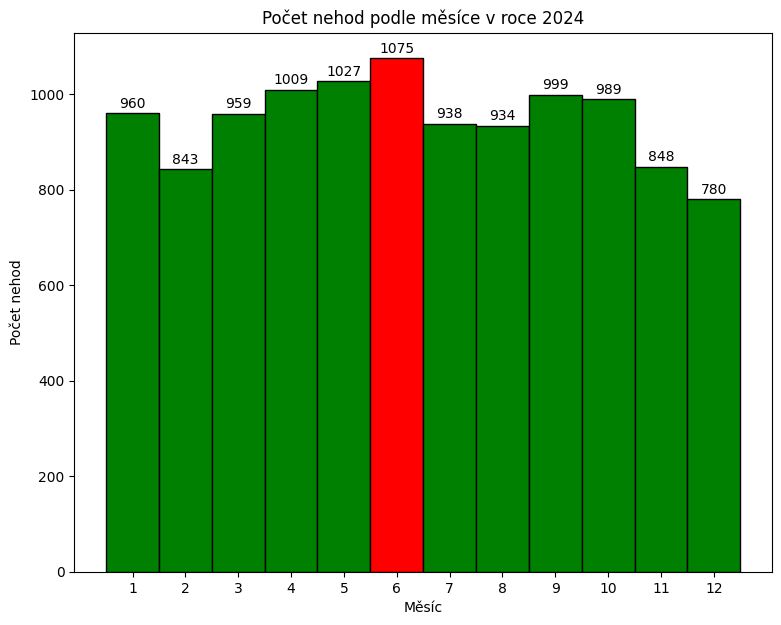

In [247]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# data geojson, utf-8 pro český jazyk
filename = "nehody_202401-202412.geojson"
file = open(filename, encoding="utf-8")
df = gpd.read_file(file)

# konverze datumu z geojson
df["date"] = pd.to_datetime(df["datum"])

# sloupec pro měsíc
df["month"] = df["date"].dt.month

# počet nehod podle měsíce
monthly_accidents = df.groupby("month").size()

# barva, nejvyšší červená, zbytek zelená
colors = ["red" if x == monthly_accidents.max()
                else "green" for x in monthly_accidents]


# sloupcový graf
plt.figure(figsize=(9, 7))
nehody = plt.bar(monthly_accidents.index, 
                 monthly_accidents.array, 
                 color=colors,
                 width=1,
                 edgecolor="black"
)
plt.xlabel("Měsíc")
plt.ylabel("Počet nehod")
plt.title("Počet nehod podle měsíce v roce 2024")
plt.xticks(np.arange(1, 13))  # osa x od 1 do 12 (měsíc)
plt.bar_label(nehody, padding=2)
plt.show()

Graf sezónní nehody v roce 2024 v Praze

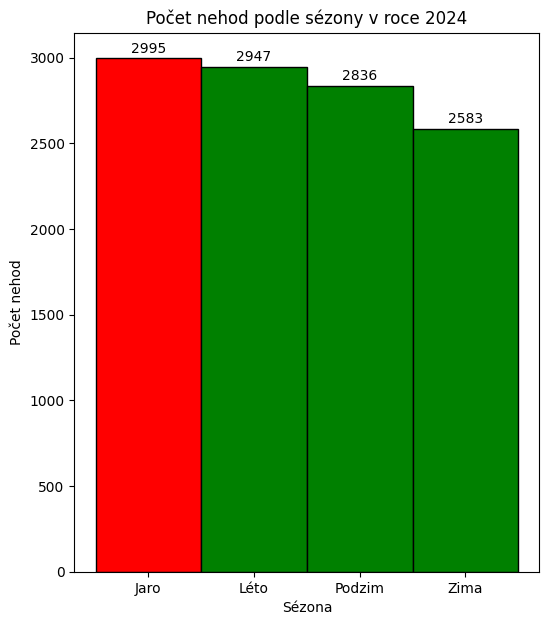

In [258]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# data geojson, utf-8 pro český jazyk
filename = "nehody_202401-202412.geojson"
file = open(filename, encoding="utf-8")
df = gpd.read_file(file)

# konverze datumu z geojson
df["date"] = pd.to_datetime(df["datum"])

# sloupec pro měsíc a sézonu
df["month"] = df["date"].dt.month
seasons = {
    "Zima": [12, 1, 2],
    "Jaro": [3, 4, 5],
    "Léto": [6, 7, 8],
    "Podzim": [9, 10, 11]
}

# najít sézonu v geojson pomocí funkce a seznamu
def find_season(month):
    for season, months in seasons.items():
        if month in months:
            return season

df["season"] = df["month"].apply(find_season)

# počet nehod podle sézony
season_accidents = df.groupby("season").size()

# barva, nejvyšší červená, zbytek zelená
colors = ["red" if x == season_accidents.max()
                else "green" for x in season_accidents]

# sloupcový graf
plt.figure(figsize=(6, 7))
nehody = plt.bar(season_accidents.index, 
                 season_accidents.array, 
                 color=colors,
                 width=1,
                 edgecolor="black"
)
plt.xlabel("Sézona")
plt.ylabel("Počet nehod")
plt.title("Počet nehod podle sézony v roce 2024")
plt.bar_label(nehody, padding=2)
plt.show()

Graf počet nehod podle dne v týdnu roku 2024 v Praze

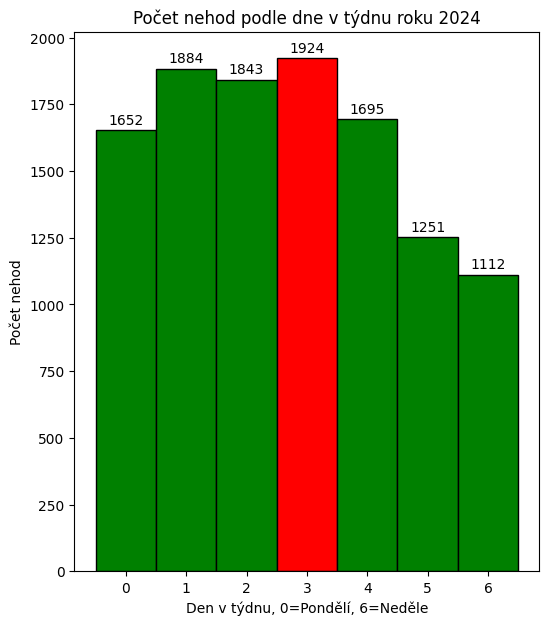

In [257]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# data geojson, utf-8 pro český jazyk
filename = "nehody_202401-202412.geojson"
file = open(filename, encoding="utf-8")
df = gpd.read_file(file)

# konverze datumu z geojson
df["date"] = pd.to_datetime(df["datum"])

# sloupec pro dní v týdnu
df["day_of_week"] = df["date"].dt.dayofweek

# počet nehod podle dne v týdnu
day_accidents = df.groupby("day_of_week").size()

# barva, nejvyšší červená, zbytek zelená
colors = ["red" if x == day_accidents.max()
                else "green" for x in day_accidents]

# sloupcový graf
plt.figure(figsize=(6, 7))
nehody = plt.bar(day_accidents.index, 
                 day_accidents.array, 
                 color=colors,
                 width=1,
                 edgecolor="black"
)  
plt.xlabel("Den v týdnu, 0=Pondělí, 6=Neděle")
plt.ylabel("Počet nehod")
plt.title("Počet nehod podle dne v týdnu roku 2024")
plt.bar_label(nehody, padding=2)
plt.show()

Graf počet nehod podle hodiny dne roku 2024 v Praze

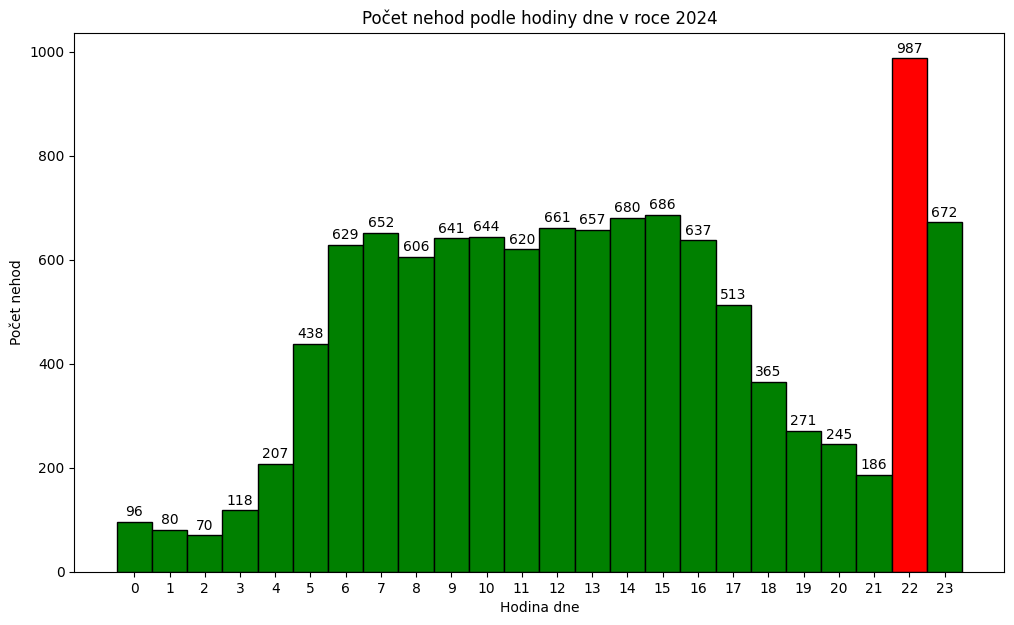

In [256]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# data geojson, utf-8 pro český jazyk
filename = "nehody_202401-202412.geojson"
file = open(filename, encoding="utf-8")
df = gpd.read_file(file)

# konverze datumu z geojson
df["date"] = pd.to_datetime(df["datum"])

# sloupec pro hodiny dne
df["hour"] = df["date"].dt.hour

# počet nehod podle hodiny dne
hour_accidents = df.groupby("hour").size()

# barva, nejvyšší červená, zbytek zelená
colors = ["red" if x == hour_accidents.max()
                else "green" for x in hour_accidents]

# sloupcový graf
plt.figure(figsize=(12, 7))
nehody = plt.bar(hour_accidents.index, 
                 hour_accidents.array, 
                 color=colors,
                 width=1,
                 edgecolor="black"
)  
plt.xlabel("Hodina dne")
plt.ylabel("Počet nehod")
plt.title("Počet nehod podle hodiny dne v roce 2024")
plt.xticks(np.arange(0, 24))
plt.bar_label(nehody, padding=2)
plt.show()

Graf typy nehod roku 2024 v Praze

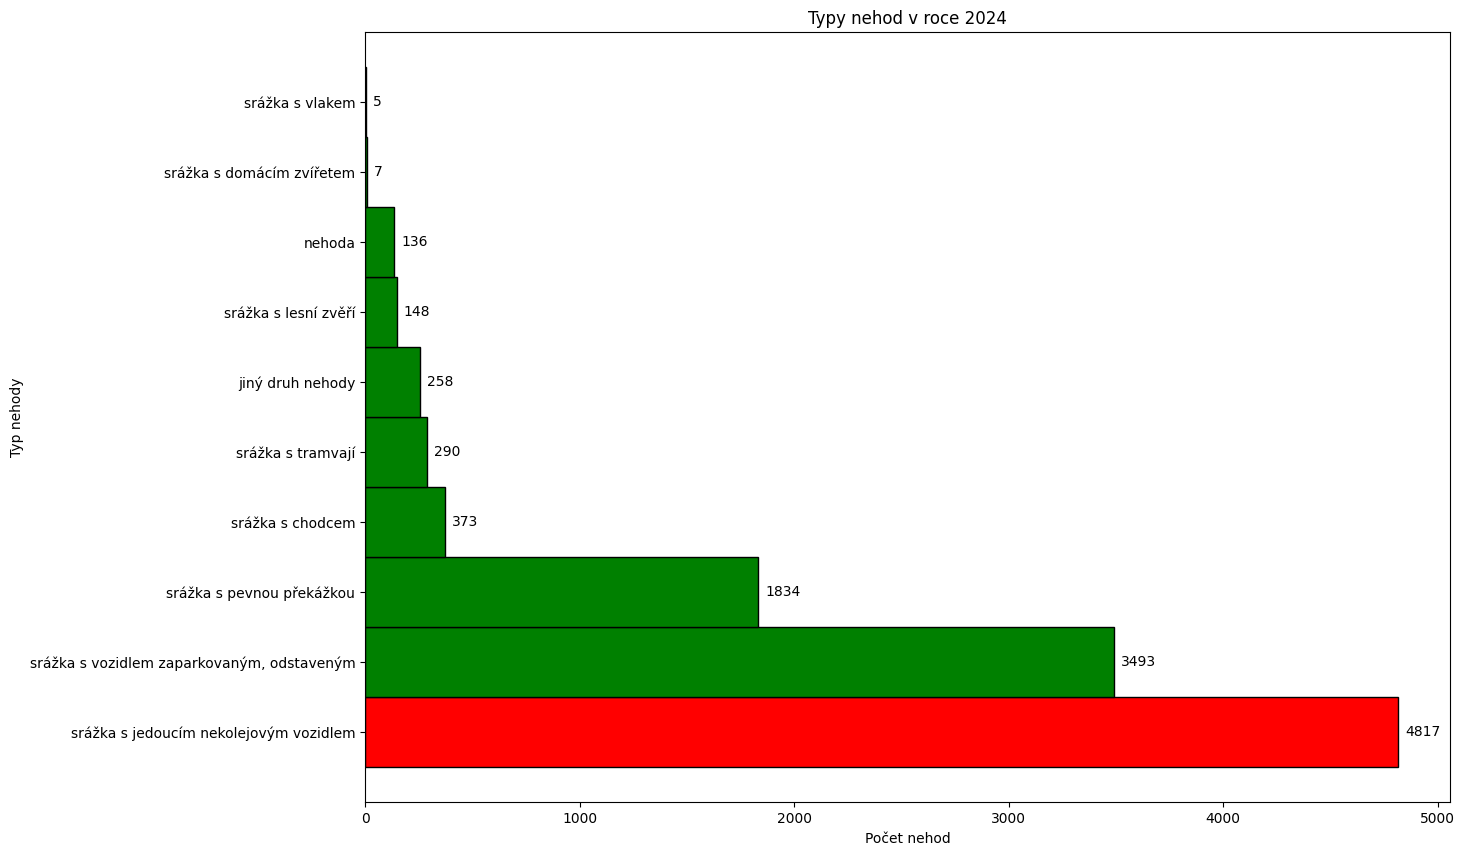

In [260]:
import geopandas as gpd
import matplotlib.pyplot as plt

# data geojson, utf-8 pro český jazyk
filename = "nehody_202401-202412.geojson"
file = open(filename, encoding="utf-8")
df = gpd.read_file(file)

# proměnná (druh nehody) z geojson
accident_types = df["druh"].value_counts()

# barva, nejvyšší červená, zbytek zelená
colors = ["red" if x == accident_types.max()
                else "green" for x in accident_types]

# sloupcový graf
plt.figure(figsize=(14, 10))
nehody = plt.barh(accident_types.index, 
                 accident_types.array, 
                 color=colors,
                 height=1,
                 edgecolor="black"
)  
plt.xlabel("Počet nehod")
plt.ylabel("Typ nehody")
plt.title("Typy nehod v roce 2024")
plt.bar_label(nehody, padding=5)
plt.show()

Graf hlavní příčiny nehod v roce 2024 v Praze

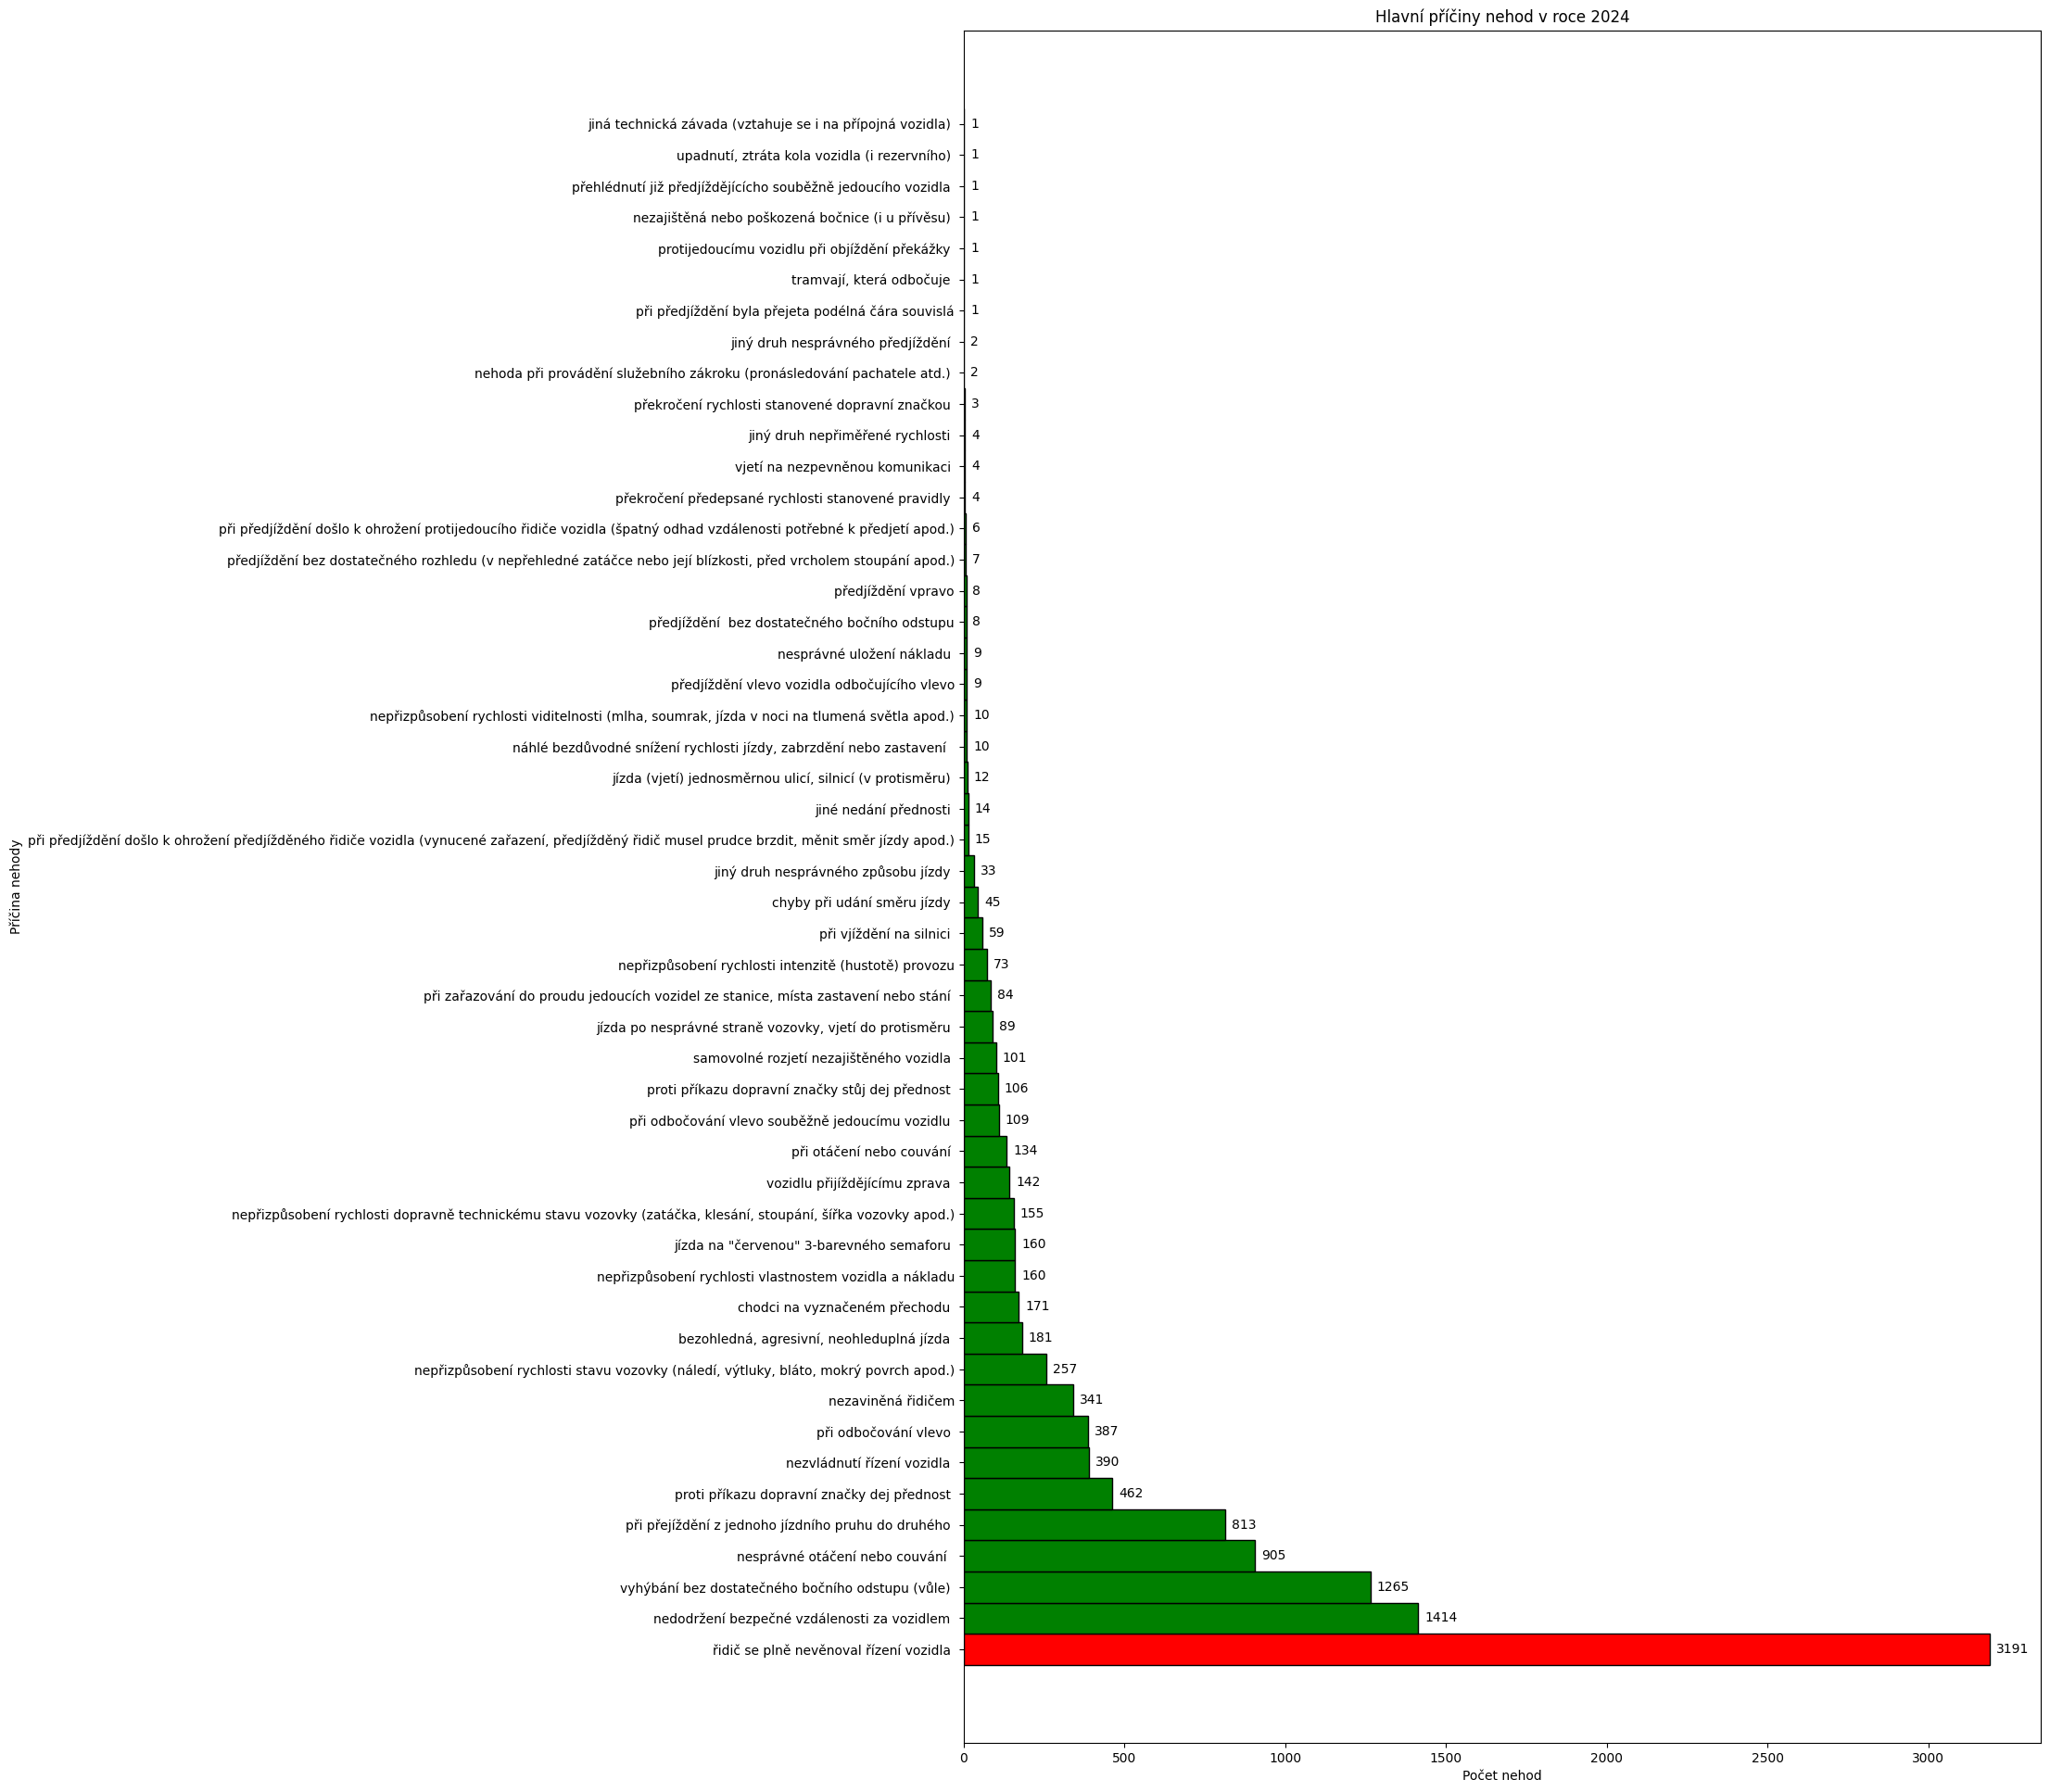

In [267]:
import geopandas as gpd
import matplotlib.pyplot as plt

# data geojson, utf-8 pro český jazyk
filename = "nehody_202401-202412.geojson"
file = open(filename, encoding="utf-8")
df = gpd.read_file(file)

# proměnná (příčiny nehody) z geojson
accident_causes = df["pricina"].value_counts()

# barva, nejvyšší červená, zbytek zelená
colors = ["red" if x == accident_causes.max()
                else "green" for x in accident_causes]

# sloupcový graf
plt.figure(figsize=(15, 24))
nehody = plt.barh(accident_causes.index, 
                 accident_causes.array, 
                 color=colors,
                 height=1,
                 edgecolor="black"
)  
plt.xlabel("Počet nehod")
plt.ylabel("Příčina nehody")
plt.title("Hlavní příčiny nehod v roce 2024")
plt.bar_label(nehody, padding=5)
plt.show()

Hmotné škody v roce 2024 v Praze

In [ ]:
import geopandas as gpd

# Načtení data, utf-8 pro český jazyk
filename = "nehody_202401-202412.geojson"
file = open(filename, encoding="utf-8")
df = gpd.read_file(file)



cost_damage = len(df["hmotna_skoda"].value_counts())
print(f"Celková hmotná škoda roku 2024 v Praze: {cost_damage}")

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices